In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [64]:
train_1 = pd.read_csv("data/CMaps/train_FD001.txt",sep=" ",header=None)
train_2 = pd.read_csv("data/CMaps/train_FD002.txt",sep=" ",header=None)
train_3 = pd.read_csv("data/CMaps/train_FD003.txt",sep=" ",header=None)
train_4 = pd.read_csv("data/CMaps/train_FD004.txt",sep=" ",header=None)


In [65]:
val_1 = pd.read_csv("data/CMaps/test_FD001.txt",sep=" ",header=None)
val_2 = pd.read_csv("data/CMaps/test_FD002.txt",sep=" ",header=None)
val_3 = pd.read_csv("data/CMaps/test_FD003.txt",sep=" ",header=None)
val_4 = pd.read_csv("data/CMaps/test_FD004.txt",sep=" ",header=None)


In [134]:
y_val1=pd.read_csv("data/CMaps/RUL_FD001.txt",sep=" ",header=None)

In [135]:
y_val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    int64  
 1   1       0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [136]:
y_val1.drop(1,axis=1,inplace=True)

In [67]:
val_1.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
      dtype='int64')

In [68]:
val_1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [69]:
columns = ['engine', 'cycle','setting1', 'setting2', 'setting3']+[ f'sensor{i}' for i in range(1,24) ]

In [70]:
print(columns)

['engine', 'cycle', 'setting1', 'setting2', 'setting3', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21', 'sensor22', 'sensor23']


In [71]:
val_1.columns=columns
train_1.columns=columns

In [72]:
val_1

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [73]:
val_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   engine    13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   setting1  13096 non-null  float64
 3   setting2  13096 non-null  float64
 4   setting3  13096 non-null  float64
 5   sensor1   13096 non-null  float64
 6   sensor2   13096 non-null  float64
 7   sensor3   13096 non-null  float64
 8   sensor4   13096 non-null  float64
 9   sensor5   13096 non-null  float64
 10  sensor6   13096 non-null  float64
 11  sensor7   13096 non-null  float64
 12  sensor8   13096 non-null  float64
 13  sensor9   13096 non-null  float64
 14  sensor10  13096 non-null  float64
 15  sensor11  13096 non-null  float64
 16  sensor12  13096 non-null  float64
 17  sensor13  13096 non-null  float64
 18  sensor14  13096 non-null  float64
 19  sensor15  13096 non-null  float64
 20  sensor16  13096 non-null  fl

In [74]:
val_1.drop(['sensor22','sensor23'],axis=1,inplace=True)
train_1.drop(['sensor22','sensor23'],axis=1,inplace=True)

In [75]:
test_1.head()

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [76]:
val_1[val_1['engine']==2]

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
31,2,1,-0.0009,0.0004,100.0,518.67,642.66,1589.30,1407.16,14.62,...,521.62,2388.14,8129.59,8.4283,0.03,392,2388,100.0,39.00,23.3923
32,2,2,-0.0011,0.0002,100.0,518.67,642.51,1588.43,1405.47,14.62,...,522.02,2388.08,8120.05,8.4414,0.03,393,2388,100.0,38.84,23.2902
33,2,3,0.0002,0.0003,100.0,518.67,642.58,1595.60,1410.86,14.62,...,521.29,2388.08,8126.75,8.3804,0.03,394,2388,100.0,39.02,23.4064
34,2,4,0.0025,0.0001,100.0,518.67,642.31,1583.43,1408.23,14.62,...,521.57,2388.06,8129.91,8.4342,0.03,393,2388,100.0,38.82,23.4699
35,2,5,0.0004,-0.0004,100.0,518.67,642.77,1585.03,1407.60,14.62,...,521.59,2388.11,8127.01,8.4247,0.03,392,2388,100.0,38.81,23.3895
36,2,6,-0.0008,-0.0003,100.0,518.67,642.50,1579.87,1402.27,14.62,...,521.80,2388.06,8128.82,8.4182,0.03,392,2388,100.0,38.78,23.2688
37,2,7,0.0019,0.0000,100.0,518.67,642.63,1594.28,1405.38,14.62,...,520.97,2388.07,8127.07,8.4113,0.03,393,2388,100.0,38.75,23.5222
38,2,8,0.0015,0.0003,100.0,518.67,642.61,1583.23,1404.58,14.62,...,521.72,2388.15,8134.66,8.4430,0.03,391,2388,100.0,38.79,23.2240
39,2,9,-0.0022,0.0003,100.0,518.67,642.28,1588.74,1407.54,14.62,...,521.48,2388.08,8131.51,8.4459,0.03,392,2388,100.0,38.71,23.2730
40,2,10,0.0021,0.0004,100.0,518.67,642.53,1590.87,1406.04,14.62,...,521.09,2388.10,8123.71,8.4211,0.03,392,2388,100.0,38.92,23.3399


In [77]:
engine_value_counts=val_1['engine'].value_counts().reset_index()
engine_value_counts.columns=['engine','count']
engine_max_cycle=val_1.groupby('engine')['cycle'].max().reset_index()
engine_max_cycle.columns=['engine','max_cycle']
comparison_df=pd.merge(engine_max_cycle,engine_value_counts,on='engine')

In [78]:
comparison_df

,engine,max_cycle,count
0,1,31,31
1,2,49,49
2,3,126,126
3,4,106,106
4,5,98,98
...,...,...,...
95,96,97,97
96,97,134,134
97,98,121,121
98,99,97,97


In [79]:
f=1
for index,row in comparison_df.iterrows():
    if row['max_cycle']!=row['count']:
        print('Data has no integrity')
        f=0
if f==1:
    print('Data has integrity')
    

Data has integrity


#### Data Integrity: 
##### The number of records for each engine is consistent with its maximum cycle value, indicating that there is a corresponding record for each cycle in the dataset and no records were missed.


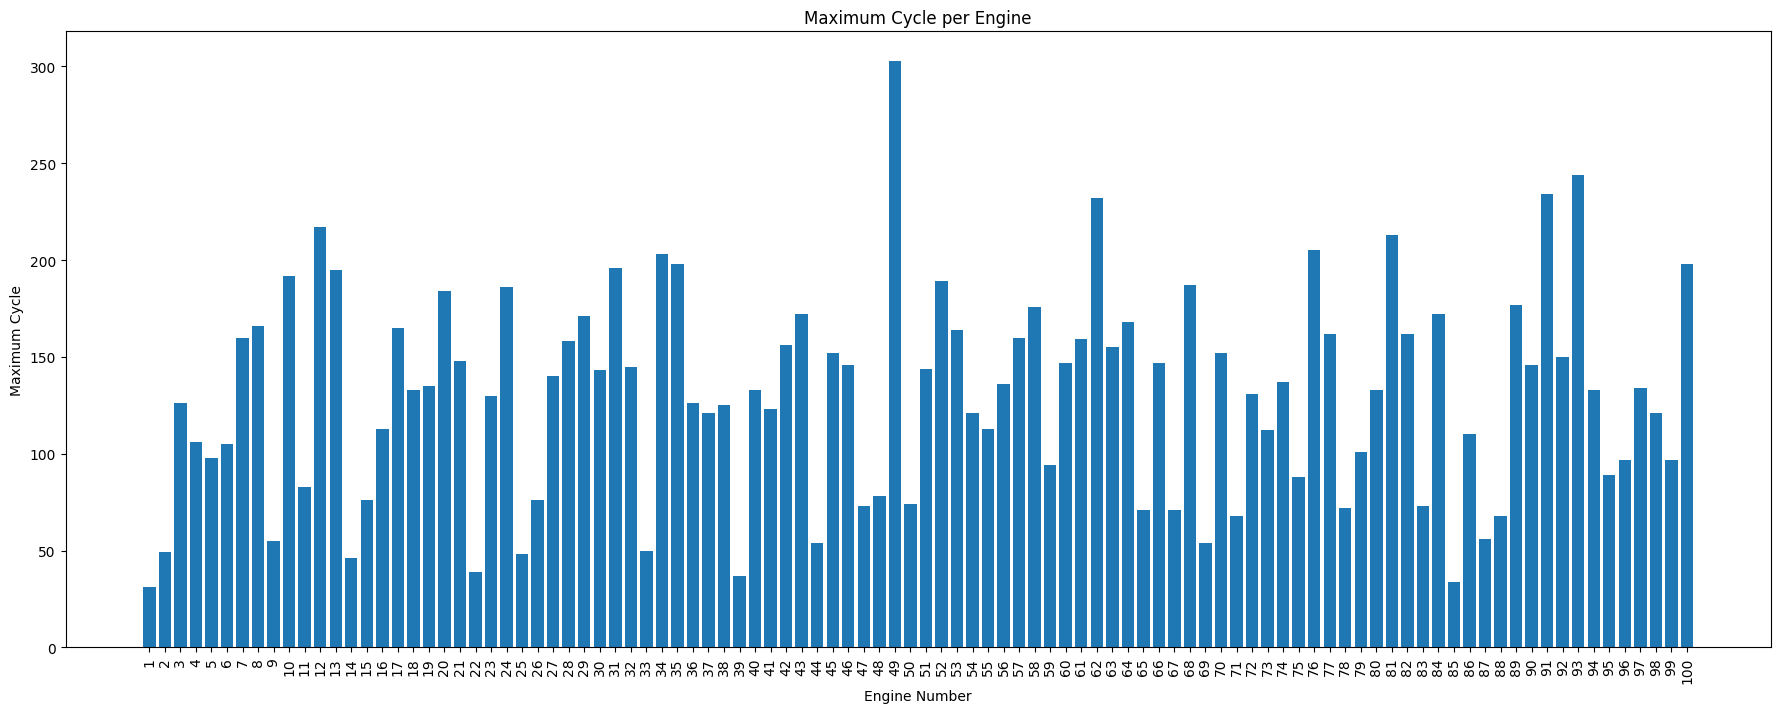

In [80]:
plt.figure(figsize=(22, 8))
plt.bar(comparison_df['engine'].astype(str), comparison_df['max_cycle'])
plt.title('Maximum Cycle per Engine')
plt.xlabel('Engine Number')
plt.ylabel('Maximum Cycle')
plt.xticks(rotation=90)
plt.show()

In [81]:
df_info=pd.concat([train_1.isna().sum(),train_1.nunique(),train_1.dtypes],axis=1)
df_info.columns=['missing values','number of unique values','data type']
df_info

,missing values,number of unique values,data type
engine,0,100,int64
cycle,0,362,int64
setting1,0,158,float64
setting2,0,13,float64
setting3,0,1,float64
sensor1,0,1,float64
sensor2,0,310,float64
sensor3,0,3012,float64
sensor4,0,4051,float64
sensor5,0,1,float64


##### We can see above some columns have only one unique values so that column does not impact our prediction , columns are ['setting3','sensor1','sensor5','sensor7','sensor10','sensor16','sensor18','sensor19']

In [82]:
#### remove some columns

In [83]:
train_1.drop(['setting3','sensor1','sensor5','sensor7','sensor10','sensor16','sensor18','sensor19'],axis=1,inplace=True)

#### detect and drop constant features¶


In [84]:
def constant_feature(df):
    constant_feature = []
    for col in df.columns:
            if abs(df[col].std() < 0.02):      
                constant_feature.append(col)
    
    return constant_feature

In [85]:
constant_feature(train_1)

['setting1', 'setting2', 'sensor6']

In [86]:
### remove constent features
train_1.drop(constant_feature(train_1),axis=1,inplace=True)



### Create RUL feature

In [87]:
train_1['rul'] = train_1.groupby('engine')['cycle'].transform('max') - train_1['cycle']


In [88]:
train_1

,engine,cycle,sensor2,sensor3,sensor4,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,rul
0,1,1,641.82,1589.70,1400.60,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [89]:
train_1_corr=train_1.corr()
train_1_corr.shape

(16, 16)

In [90]:
mask=np.tril(np.ones(train_1_corr.shape),k=-1).astype(bool)
train_1_corr=train_1_corr.where(mask)

<Axes: title={'center': 'correlation'}>

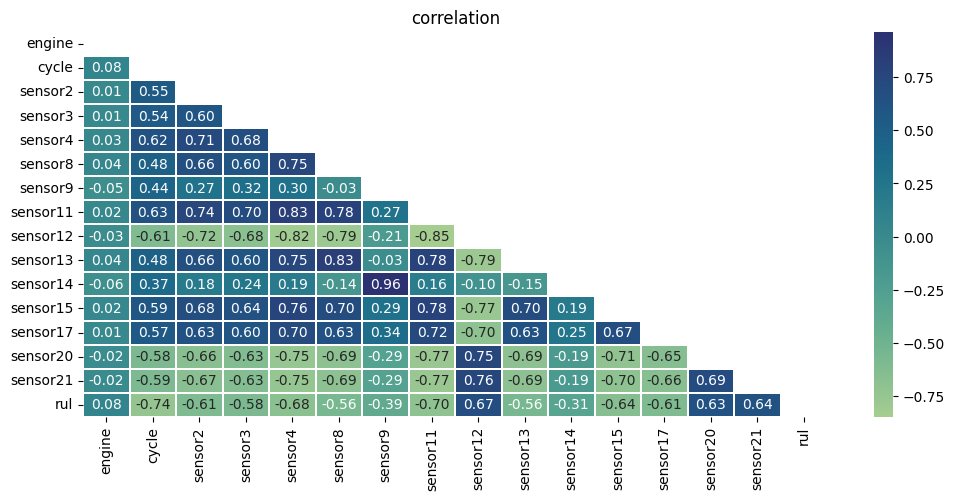

In [149]:
plt.figure(figsize = (12,5))

plt.title('correlation')
sns.heatmap(train_1_corr,fmt = '0.2f',cmap='crest',annot=True,linewidths=0.01)

In [92]:
high_corr = []
for col in train_1_corr.columns:
    for row in train_1_corr.index:
        if abs(train_1_corr.loc[col , row]) > 0.95 :
            high_corr.append((col , row))
high_corr

[('sensor14', 'sensor9')]

In [93]:
# remove one of them sensor14 or sensor9
train_1.drop('sensor9',axis=1,inplace=True)

In [94]:
train_1['cycle'].describe().T

count    20631.000000
mean       108.807862
std         68.880990
min          1.000000
25%         52.000000
50%        104.000000
75%        156.000000
max        362.000000
Name: cycle, dtype: float64

In [95]:
train_1

,engine,cycle,sensor2,sensor3,sensor4,sensor8,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,rul
0,1,1,641.82,1589.70,1400.60,2388.06,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,2388.04,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,2388.08,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,2388.11,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,2388.06,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,2388.19,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,2388.23,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,2388.24,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,2388.25,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


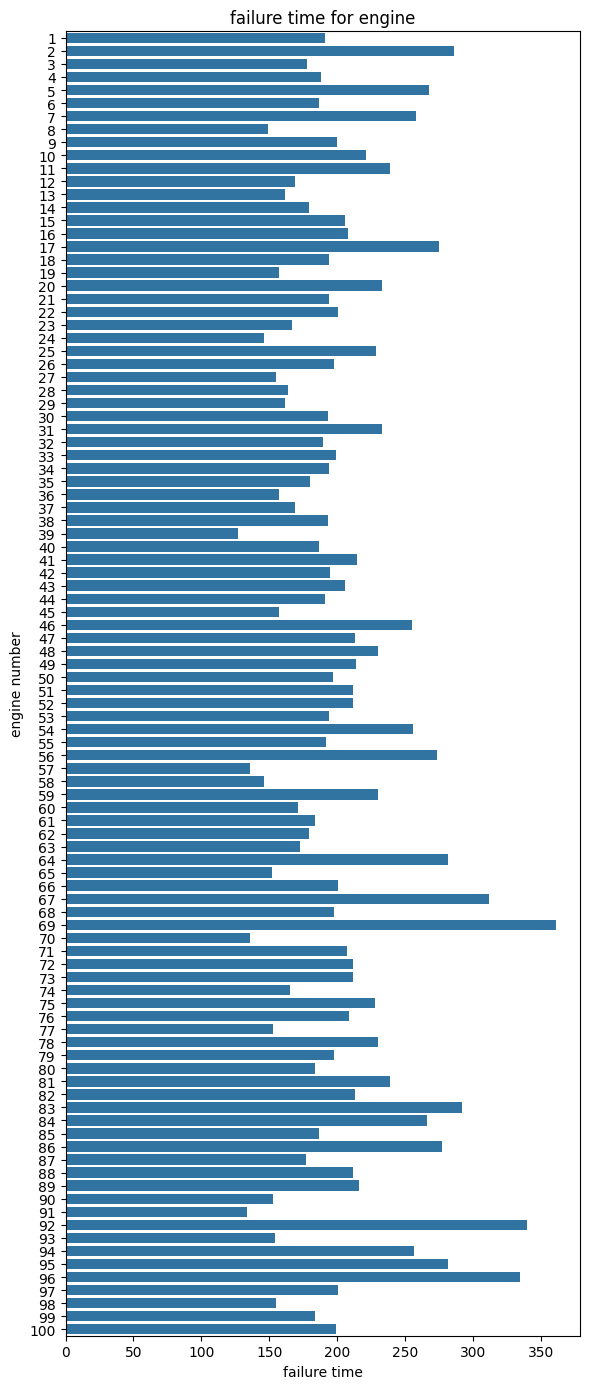

In [96]:
failure_time = train_1.groupby('engine')['rul'].max()
plt.figure(figsize = (6,14))
sns.barplot(y = failure_time.index , x = failure_time.values , orient='h')
plt.title('failure time for engine')
plt.xlabel('failure time')
plt.ylabel('engine number')
plt.tight_layout()
plt.show()

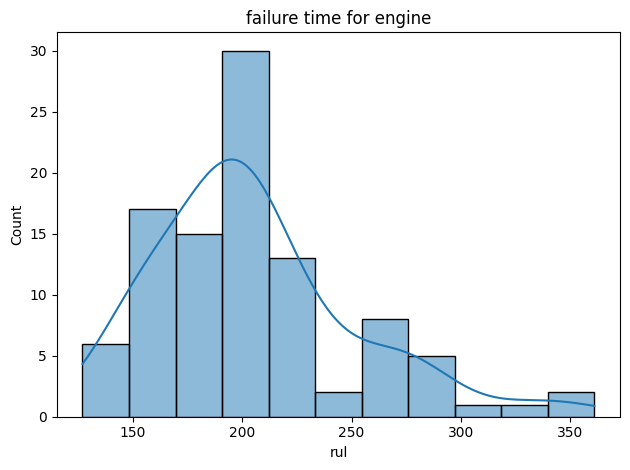

In [97]:
sns.histplot(failure_time,kde=True)
plt.title('failure time for engine')
plt.title('failure time for engine')
plt.tight_layout()

In [98]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

i=1
for x in dict_list :
    Sensor_dictionary[f'sensor{i}']=x
    i+=1
Sensor_dictionary

{'sensor1': '(Fan inlet temperature) (◦R)',
 'sensor2': '(LPC outlet temperature) (◦R)',
 'sensor3': '(HPC outlet temperature) (◦R)',
 'sensor4': '(LPT outlet temperature) (◦R)',
 'sensor5': '(Fan inlet Pressure) (psia)',
 'sensor6': '(bypass-duct pressure) (psia)',
 'sensor7': '(HPC outlet pressure) (psia)',
 'sensor8': '(Physical fan speed) (rpm)',
 'sensor9': '(Physical core speed) (rpm)',
 'sensor10': '(Engine pressure ratio(P50/P2)',
 'sensor11': '(HPC outlet Static pressure) (psia)',
 'sensor12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sensor13': '(Corrected fan speed) (rpm)',
 'sensor14': '(Corrected core speed) (rpm)',
 'sensor15': '(Bypass Ratio) ',
 'sensor16': '(Burner fuel-air ratio)',
 'sensor17': '(Bleed Enthalpy)',
 'sensor18': '(Required fan speed)',
 'sensor19': '(Required fan conversion speed)',
 'sensor20': '(High-pressure turbines Cool air flow)',
 'sensor21': '(Low-pressure turbines Cool air flow)'}

In [99]:
def plot_signal(df , signal_name , Sensor_dictionary):
    figure = plt.figure(figsize=(10,4))

    for engine in df['engine'].unique():  # hint
        if (engine % 10 ==0 ):
            #print(engine)
            rolling_window = df[ df['engine']==engine ].rolling(10).mean()
            sns.lineplot( data = rolling_window , x = 'rul' , y =signal_name  , label =engine)
    
    plt.tight_layout(), plt.xlim(250 , 0)
    plt.xlabel('Remainded Usefull Life (RUL)') , plt.ylabel(Sensor_dictionary[signal_name])
    plt.show()


<Figure size 1000x400 with 0 Axes>

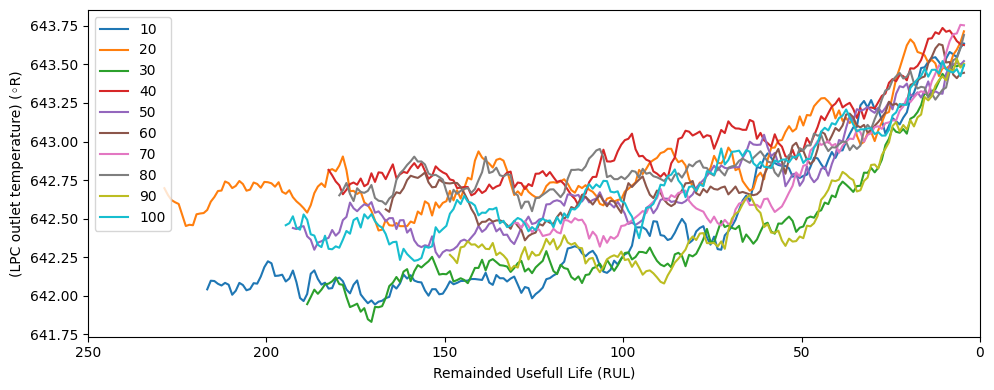

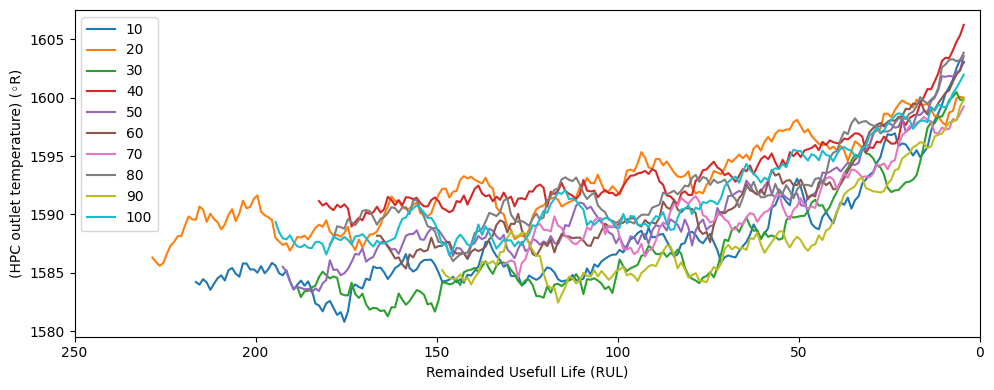

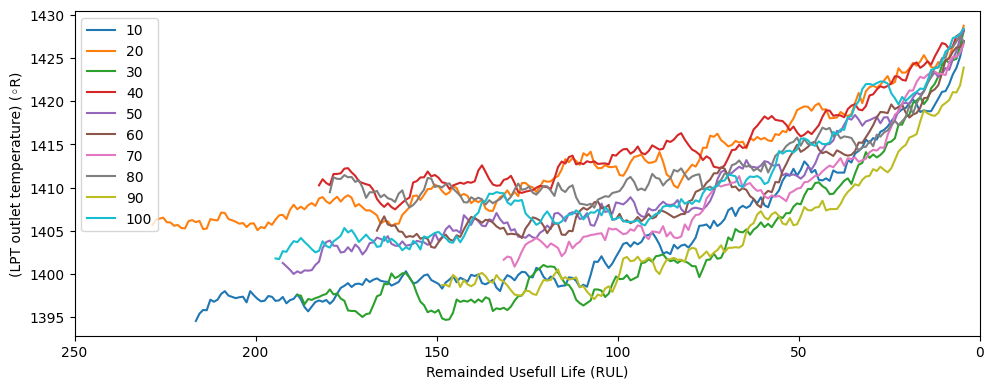

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

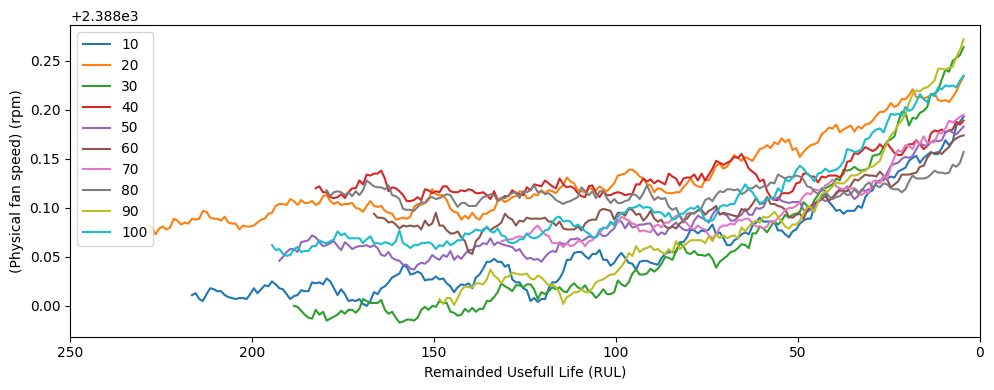

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

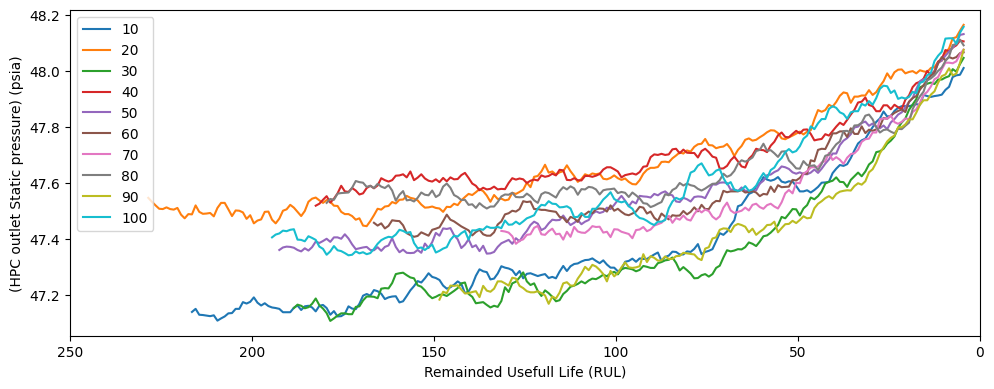

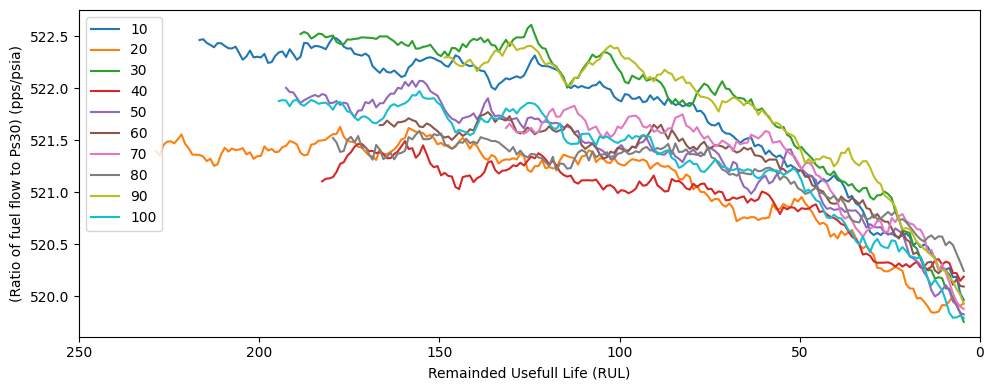

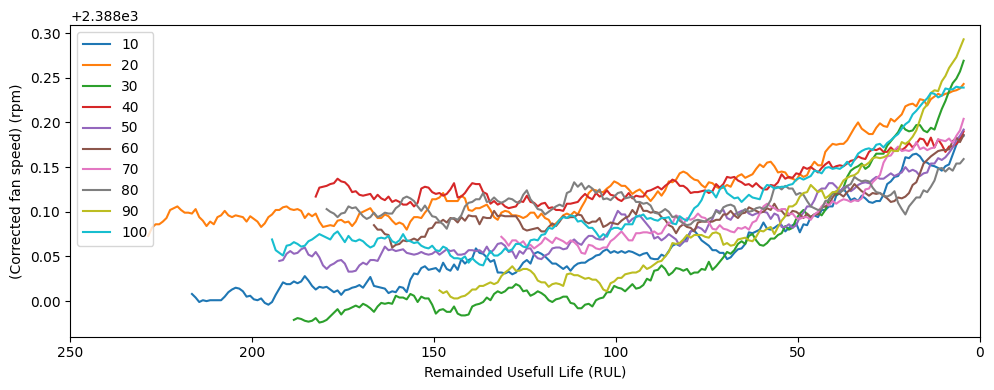

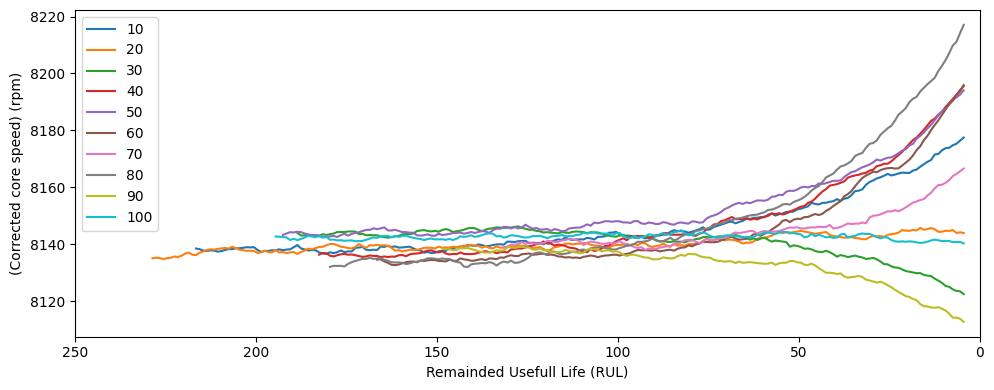

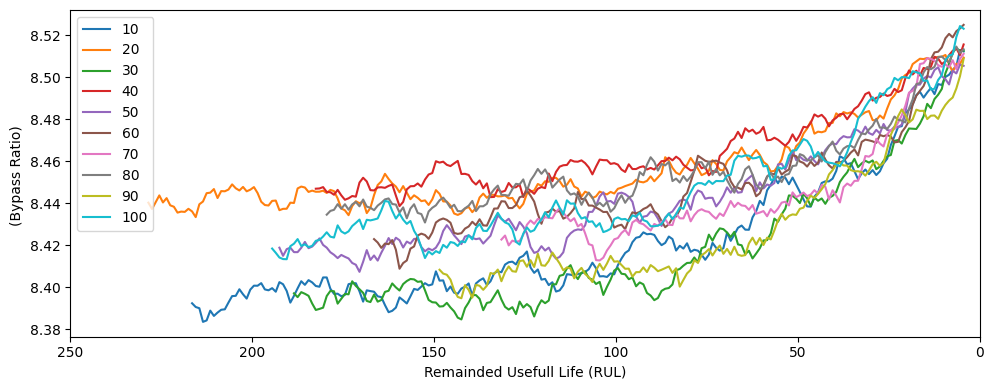

<Figure size 1000x400 with 0 Axes>

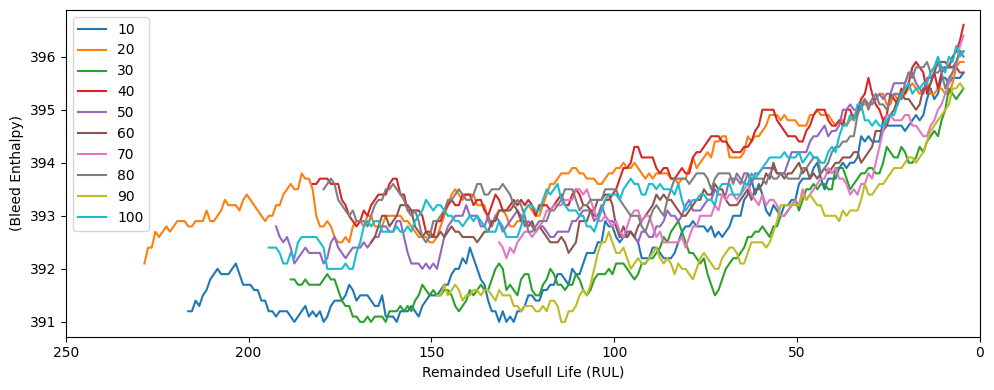

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

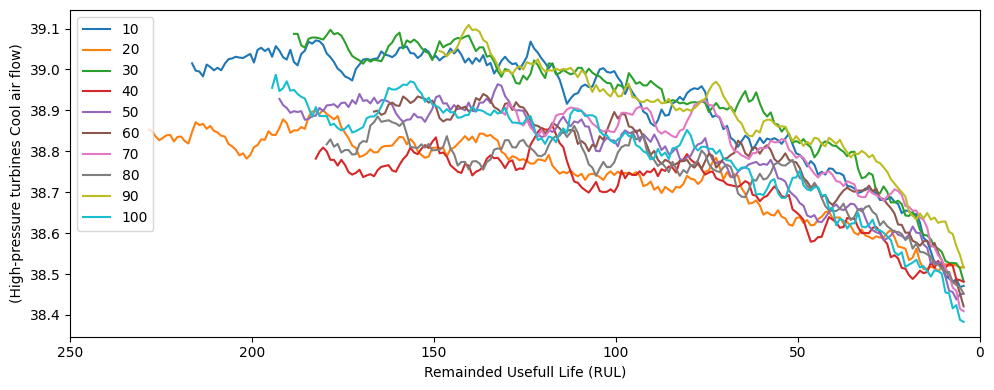

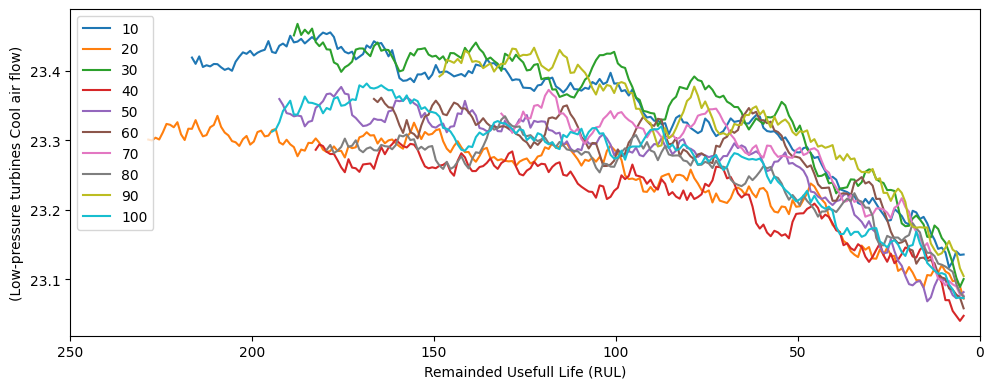

In [100]:
for i in range (1,22):
    try:
        plot_signal(train_1 , 'sensor'+str(i)  , Sensor_dictionary)
    except:
        pass

In [101]:
print(train_1.columns)
features = train_1.columns[2:-1]   # drop  engine , time , rul of  dataset
features

Index(['engine', 'cycle', 'sensor2', 'sensor3', 'sensor4', 'sensor8',
       'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17',
       'sensor20', 'sensor21', 'rul'],
      dtype='object')


Index(['sensor2', 'sensor3', 'sensor4', 'sensor8', 'sensor11', 'sensor12',
       'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21'],
      dtype='object')

In [106]:
from sklearn.model_selection import train_test_split
X = train_1[features]
y = train_1['rul']

In [107]:
X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size=0.2 , random_state=42)

In [111]:
X_val = val_1.groupby('engine').last().reset_index()
X_val = X_val[features] 

In [113]:
X_train.shape , X_test.shape , X_val.shape


((16504, 12), (4127, 12), (100, 12))

### Transforming Data

In [114]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [115]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [150]:
from sklearn.metrics import root_mean_squared_error , r2_score 


In [151]:
def metrics(y_true , y_pred , label = 'train'):
    
    
    rse = mean_squared_error(y_true , y_pred)
    r2 = r2_score(y_true , y_pred)
    print(f'for {label} set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')

## Machine Learning Model

#### Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg.fit(X_train , y_train)

LinearRegression()

In [138]:

y_pred = model_linreg.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_linreg.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = model_linreg.predict(X_val)
metrics(y_val1 , y_pred , label = 'val')


for train set , RMSE = 44.93 , r2_score = 57.84%
for test set , RMSE = 44.33 , r2_score = 56.98%
for val set , RMSE = 31.38 , r2_score = 42.96%


### decision tree

In [140]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train , y_train)

y_pred = model_tree.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_tree.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = model_tree.predict(X_val)
metrics(y_val1 , y_pred , 'val')

for train set , RMSE = 0.00 , r2_score = 100.00%
for test set , RMSE = 59.90 , r2_score = 21.47%
for val set , RMSE = 43.53 , r2_score = -9.74%


In [142]:
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor(random_state=42 , n_jobs=-1 )
model_forest.fit(X_train , y_train)

y_pred = model_forest.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_forest.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = model_forest.predict(X_val)
metrics(y_val1 , y_pred , 'val')

for train set , RMSE = 15.85 , r2_score = 94.75%
for test set , RMSE = 41.80 , r2_score = 61.75%
for val set , RMSE = 32.43 , r2_score = 39.11%


##### Model is overfited

In [144]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from scipy.stats import randint

RandomForestRegressor()
param ={
    'max_depth' : [None , 10,20] , 
    'min_samples_split' : randint(2,10) , 
    'min_samples_leaf' :  randint(1,5)
} 
random_search_forest = RandomizedSearchCV(estimator=model_forest , param_distributions=param , n_iter=10 ,
                  cv = 5 , scoring = 'r2' , random_state=42 , n_jobs=-1)

random_search_forest.fit(X_train , y_train)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7054ad194850>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7054ad0a18a0>},
                   random_state=42, scoring='r2')

In [145]:
df_res_forest = pd.DataFrame(random_search_forest.cv_results_).sort_values('mean_test_score')
df_res_forest[['mean_test_score' , 'params']]

,mean_test_score,params
9,0.627971,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
2,0.628350,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
6,0.628789,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
4,0.630386,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
1,0.630386,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
0,0.630585,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_..."
5,0.630730,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
3,0.633768,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_..."
8,0.633859,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
7,0.634098,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."


In [147]:
model_fine_forest = random_search_forest.best_estimator_
print(model_fine_forest)

y_pred = model_fine_forest.predict(X_val)
metrics(y_val1 , y_pred, label = 'val')

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_jobs=-1, random_state=42)
for val set , RMSE = 31.13 , r2_score = 43.89%


Text(0.5, 1.0, 'random forest model')

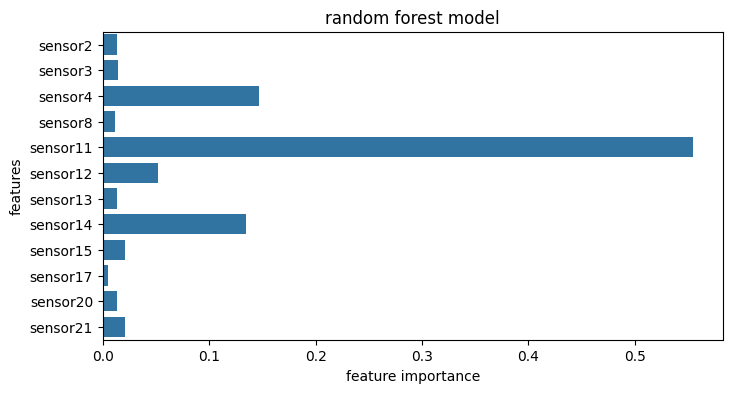

In [148]:
plt.figure(figsize = (8,4))
sns.barplot(y = features , x = model_fine_forest.feature_importances_ )
plt.xlabel('feature importance')
plt.ylabel('features')
plt.title('random forest model')